# Importing the required python libraries



In [1]:

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt 
import seaborn as sb # used to plot the heatmap
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
start1 = time.perf_counter()

In [2]:
# The data is read as a pandas data frame
data = pd.read_csv("finalized_data.csv").dropna()

# Data point to be predicted

In [3]:
_input = [12.0,
1,
2,
1,
2,
9.0,
1,
0.0,
10.0,
[-60.6, -45.0, 3.6],
[-60.6, -45.0, 2.8],
[-60.6, -45.0, 2.0],
[-60.6, -45.0, 1.2],
[-60.6, -45.0, 0.4],
[-59.8, -45.0, 3.6],
[-59.8, -45.0, 2.8],
[-59.8, -45.0, 2.0],
[-59.8, -45.0, 1.2],
[-59.8, -45.0, 0.4],
[-59.0, -45.0, 3.6],
[-59.0, -45.0, 2.8],
[-59.0, -45.0, 2.0],
[-59.0, -45.0, 1.2],
[-59.0, -45.0, 0.4],
[-58.2, -45.0, 3.6],
[-58.2, -45.0, 2.8],
[-58.2, -45.0, 2.0],
[-58.2, -45.0, 1.2],
[-58.2, -45.0, 0.4],
[-57.4, -45.0, 3.6],
[-57.4, -45.0, 2.8],
[-57.4, -45.0, 2.0],
[-57.4, -45.0, 1.2],
[-57.4, -45.0, 0.4],
         
]


In [4]:
def data_create(_inp):
    test_dat=np.zeros((25,13))
    tmp = np.tile(_inp[0],(25)) 
    test_dat[:,0] = tmp
    tmp = np.tile(_inp[1],(25))
    test_dat[:,1] = tmp
    tmp = np.tile(_inp[2],(25))
    test_dat[:,2] = tmp
    tmp = np.tile(_inp[3],(25))
    test_dat[:,3] = tmp
    tmp = np.tile(_inp[4],(25))
    test_dat[:,4] = tmp
    tmp = np.tile(_inp[5],(25))
    test_dat[:,5] = tmp
    tmp = np.tile(_inp[6],(25))
    test_dat[:,6] = tmp
    tmp = np.tile(_inp[7],(25))
    test_dat[:,7] = tmp
    tmp = np.tile(_inp[8],(25))
    test_dat[:,8] = tmp

    for i in range(9,34):
        tmp =list(_input[i])  
        tmp = np.asarray(tmp)
        tmp = np.reshape(tmp,(1,tmp.shape[0]))
        test_dat[i-9,9:12] = tmp
    return test_dat

 

In [5]:
n = len(_input)/34
test_data=np.zeros((0,13))
start=0
for i in range(int(n)):
    T = data_create(_input[start:start+34])
    test_data = np.concatenate((test_data,T),axis=0)
    start = start+34

 
test_data = pd.DataFrame(test_data, columns=[str(i) for i in range(13)])  

dat = test_data.values
new_dat = np.zeros((test_data.shape[0], test_data.shape[1]))

In [6]:
for i in range(int(n)):
    cur = dat[i*25,:] 
    D = data[data['0'] == int(cur[0])]
    if D.shape[0]!=0:
     
        D = D[D['1'] == cur[1]] 
        
        D = D[D['2'] == cur[2]] 
        
        D = D[D['3'] == cur[3]] 
        
        D = D[D['4'] == cur[4]] 
        
        D = D[D['5'] == cur[5]] 
        
        D = D[D['6'] == cur[6]] 
        
        D = D[D['7'] == cur[7]] 

        D = D[D['8'] == cur[8]] 
        
    
    D = D.values
 
    test_data.iloc[i*25:(i+1)*25,9:12] = D[:,9:12]

In [7]:
# Array that specifies which columns are categorical inputs
categorical_features = ["0", "1", "2", "3", "4","5", "6", "7", "8"] # Except column "7", all are label encoded and "7" is 
                                                               # one-hot encoded. 
# Array that specifies which columns are continuous inputs
contnuous_features = ["9","10","11"]
output_feature = "12"  # specifies which column is output


temp={}
label_encoders = {} 
# for loop starts for label encoding
for i in range(0,len(categorical_features)): 
    #codes for one-hot encoding
    label_encoders[categorical_features[i]] = OneHotEncoder(handle_unknown='ignore')
    label_encoders[categorical_features[i]].fit(data[categorical_features[i]].values.reshape(-1,1))
    temp[categorical_features[i]]=label_encoders[categorical_features[i]].transform(test_data[categorical_features[i]].values.reshape(-1,1)).toarray() 


In [8]:
ind=13
new_categorical_features=[]
for i in range(0,len(categorical_features)):
    for j in range(0,temp[categorical_features[i]].shape[1]):
        test_data[str(ind)] = temp[categorical_features[i]][:,j]
        new_categorical_features.append(str(ind)) # Stroing the column identity of newly added one-hot encoded columns as 
                                                  # categorical input.
        ind=ind+1
    test_data=test_data.drop([categorical_features[i]], axis=1) # The old column is deleted from the data

In [9]:
test_data = test_data.values
test_data_new=test_data[:,0:3]
test_data = np.concatenate((test_data_new, test_data[:,4:]),axis=1)
test_data.shape

(25, 60)

In [10]:
filename = 'C:/Users/iist/Documents/asif/project/New folder/DT_finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(test_data)
y_pred=y_pred.reshape(y_pred.shape[0],1) # Reshaping y_pred for visualization
output_ = y_pred

In [11]:
end = time.perf_counter()

# total time taken
print(f"Runtime of the program is {end - start1}")

Runtime of the program is 4.288933


# The output heatmap

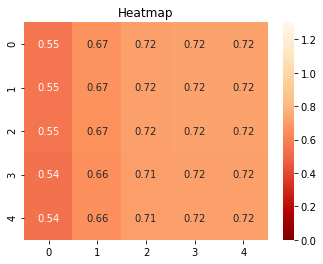

In [12]:
y_pred = np.reshape(y_pred,(5,5)) 
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Heatmap')
heat_map = sb.heatmap(y_pred,  vmin = 0, vmax = 1.30141, cmap="OrRd_r", annot=True)
plt.show()